In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [4]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def compute_mse(y, tx, beta):
    """compute the loss by mse."""
    e = y - tx.dot(beta)
    if len(e) == 0: return 0
    mse = e.dot(e) / (2 * len(e))
    return mse

def compute_loss(y, w, fi):
    return np.sqrt(2*compute_mse(y, fi, w))

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    x_test = np.take(x,k_indices);
    y_test = np.take(y,k_indices);
    x_train = np.delete(x,k_indices);
    y_train = np.delete(y,k_indices);
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    train_poly = build_poly(x_train,degree)
    test_poly = build_poly(x_test,degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w = ridge_regression(y_train, train_poly, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = compute_loss(y_train, w, train_poly)
    loss_te = compute_loss(y_test, w, test_poly)
    return loss_tr, loss_te

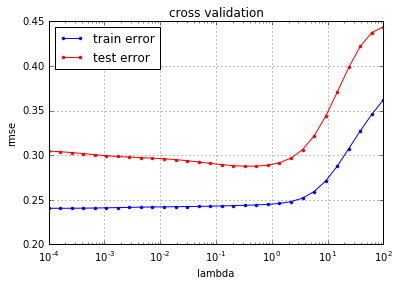

In [5]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    for lam in lambdas:
        loss_tr = 0
        loss_te = 0
        for k_i in k_indices:
            loss_tr_ = 0;
            loss_te_ = 0;
            loss_tr_, loss_te_ = cross_validation(y, x, k_i, 0, lam, degree)
            loss_tr = loss_tr + loss_tr_
            loss_te = loss_te + loss_te_
        rmse_tr = np.append(rmse_tr, loss_tr/k_fold)
        rmse_te = np.append(rmse_te, loss_te/k_fold)
    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

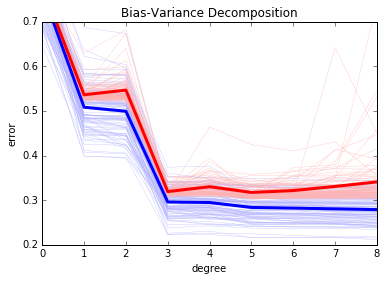

In [23]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(0, 9)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        x_train, y_train, x_test, y_test = split_data(x, y, ratio_train, seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        for degree in degrees:
            train_poly = build_poly(x_train,degree)
            test_poly = build_poly(x_test,degree)
            #wMLS = least_squares(y_train, train_poly)
            wMLS = ridge_regression(y_train, train_poly, 0.1)
            rmse_tr_ = compute_loss(y_train, wMLS, train_poly)
            rmse_te_ = compute_loss(y_test, wMLS, test_poly)
            rmse_tr[index_seed][degree] = rmse_tr_
            rmse_te[index_seed][degree] = rmse_te_

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

In [24]:
TODO: BONUS

SyntaxError: invalid syntax (<ipython-input-24-22becffe23d4>, line 1)